# Two qualitative predictors
We recycle a textbook example taken from McClave JT., Benson PG. e Sincich T. (2014). *Statistics for
Business and Economics*. Pearson Education Limited.\
We want to study the eﬀect on the response (variable *distance*) of 4 diﬀerent brands of golf ball (A,B,C,D)
(variable *brand*) and the club type (DRIVER/IRON) (variable *club*). These two features are qualitative predictors, also called factors. A robot player is used.\

Let’s build the data in wide format, i.e. enter the data online. The data shows 4 replications for each pair of brand and club)

In [1]:
golfwide <- read.table(header=T, text='
club A B C D 
DRIVER 226.4 238.3 240.5 219.8
DRIVER 232.6 231.7 246.9 228.7
DRIVER 234.0 227.7 240.3 232.9
DRIVER 220.7 237.2 244.7 237.6
IRON 163.8 184.4 179.0 157.8
IRON 179.4 180.6 168.0 161.8
IRON 168.6 179.5 165.2 162.1
IRON 173.4 186.2 156.5 160.3
')

To tranform from wide format to long format, we use the library *tidyr()*.

In [2]:
library(tidyr)
golflong <- gather(golfwide, brand, distance, A:D)
golflong

club,brand,distance
<chr>,<chr>,<dbl>
DRIVER,A,226.4
DRIVER,A,232.6
DRIVER,A,234.0
DRIVER,A,220.7
IRON,A,163.8
IRON,A,179.4
IRON,A,168.6
IRON,A,173.4
DRIVER,B,238.3


Let us also use the old-fashioned attach/detach dynamics and study first the eﬀect of *brand* only (a linear model with one factor only)

In [3]:
attach(golflong)
summary(lm(distance ~ brand))


Call:
lm(formula = distance ~ brand)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.638 -31.703  -0.481  32.947  42.475 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  199.863     12.262  16.299 8.04e-16 ***
brandB         8.337     17.341   0.481    0.634    
brandC         5.275     17.341   0.304    0.763    
brandD        -4.737     17.341  -0.273    0.787    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.68 on 28 degrees of freedom
Multiple R-squared:  0.02322,	Adjusted R-squared:  -0.08143 
F-statistic: 0.2219 on 3 and 28 DF,  p-value: 0.8804


In [4]:
anova(lm(distance ~ brand))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
brand,3,800.7362,266.9121,0.2218898,0.880369
Residuals,28,33681.3125,1202.9040,NA,NA


In [5]:
model.matrix(lm(distance~brand)) ### this is the design matrix

,(Intercept),brandB,brandC,brandD
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,1,0,0
10,1,1,0,0


To visualize dta, we can use boxplots or more specialized graphics for qualitative predictors (for the latter, we have to define the predictors explicitely as factor objects in R). Recall that prettier graphics can always be produced using *ggplot2()*.

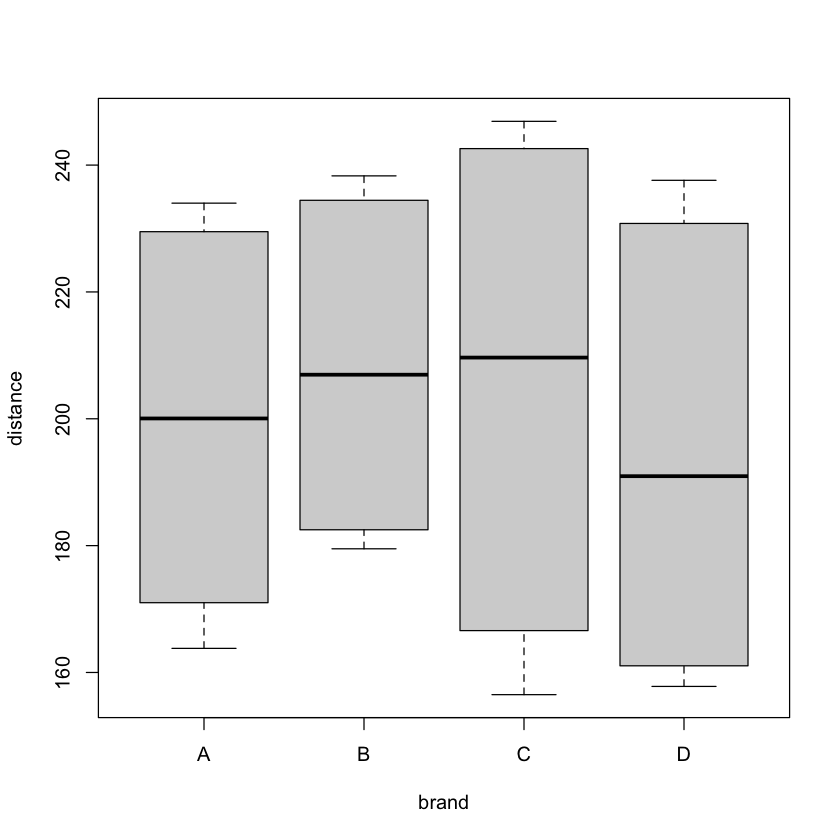

In [6]:
boxplot(distance ~ brand)

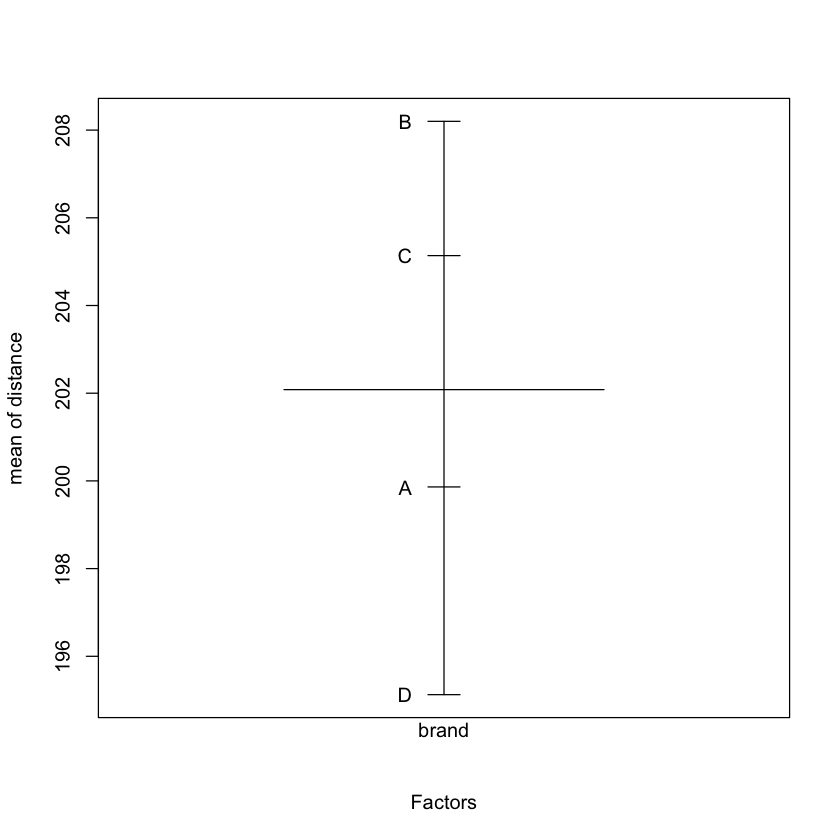

In [7]:
brand <- as.factor(brand)
club <- as.factor(club)
plot.design(distance ~ brand)

## Additive and non-additive models
Now let us add the second factor *club* and build a ‘small’ additive model ...

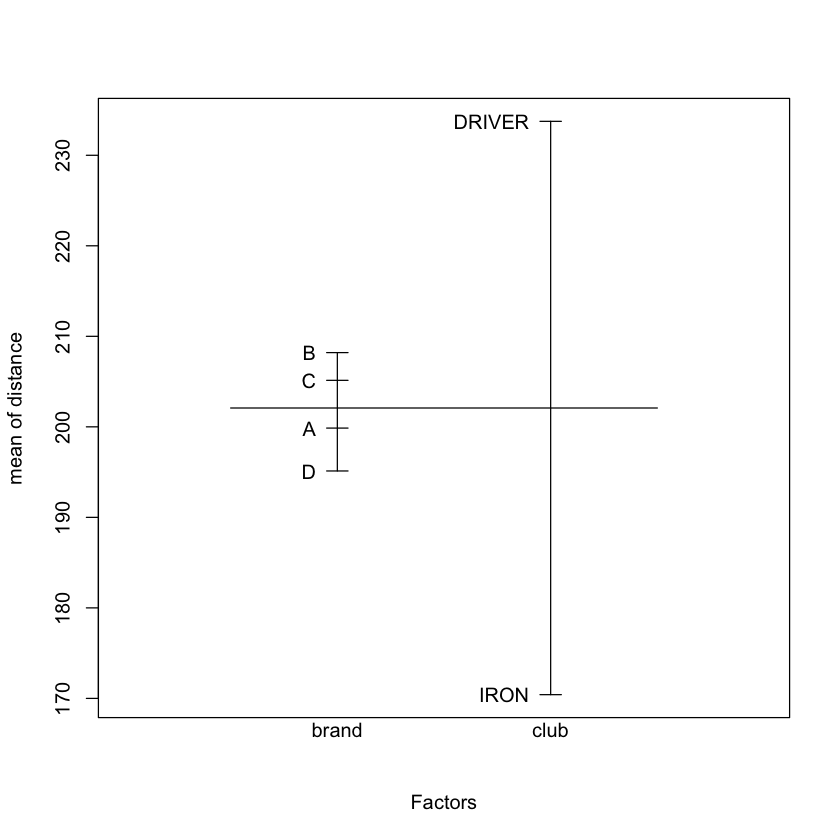

In [9]:
plot.design(distance ~ brand + club)

In [10]:
small <- lm(distance ~ brand + club)
summary(small)


Call:
lm(formula = distance ~ brand + club)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.9688  -5.2156   0.7375   5.2875  11.2063 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  231.531      3.032  76.371   <2e-16 ***
brandB         8.337      3.835   2.174   0.0386 *  
brandC         5.275      3.835   1.376   0.1803    
brandD        -4.737      3.835  -1.235   0.2273    
clubIRON     -63.337      2.712 -23.358   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.67 on 27 degrees of freedom
Multiple R-squared:  0.9539,	Adjusted R-squared:  0.9471 
F-statistic: 139.8 on 4 and 27 DF,  p-value: < 2.2e-16


In [11]:
anova(small)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
brand,3,800.7362,266.91208,4.537603,1.060967e-02
club,1,32093.1112,32093.11125,545.594586,1.925136e-19
Residuals,27,1588.2013,58.82227,NA,NA


In [12]:
model.matrix(small)

,(Intercept),brandB,brandC,brandD,clubIRON
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,1
6,1,0,0,0,1
7,1,0,0,0,1
8,1,0,0,0,1
9,1,1,0,0,0
10,1,1,0,0,0


... and a larger model with interaction. An interaction plot suggests interactions may be significant, but we
have to test for it since interaction plots are subject to sampling variation.

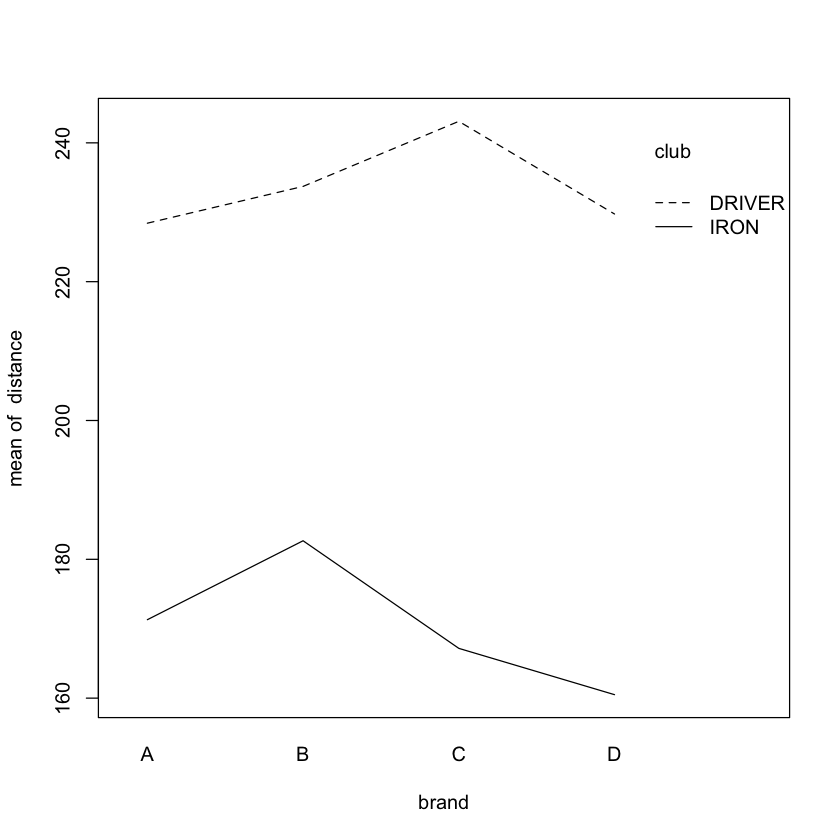

In [13]:
#plot.design(distance ~ brand*club)
interaction.plot(brand, club, distance)

In [14]:
large <- lm(distance ~ brand*club)
summary(large)


Call:
lm(formula = distance ~ brand * club)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6750  -2.7000   0.3125   3.4875  11.8250 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      228.425      2.927  78.051  < 2e-16 ***
brandB             5.300      4.139   1.281  0.21259    
brandC            14.675      4.139   3.546  0.00165 ** 
brandD             1.325      4.139   0.320  0.75163    
clubIRON         -57.125      4.139 -13.802 6.55e-13 ***
brandB:clubIRON    6.075      5.853   1.038  0.30966    
brandC:clubIRON  -18.800      5.853  -3.212  0.00373 ** 
brandD:clubIRON  -12.125      5.853  -2.072  0.04923 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.853 on 24 degrees of freedom
Multiple R-squared:  0.9762,	Adjusted R-squared:  0.9692 
F-statistic: 140.4 on 7 and 24 DF,  p-value: < 2.2e-16


In [15]:
model.matrix(large)

,(Intercept),brandB,brandC,brandD,clubIRON,brandB:clubIRON,brandC:clubIRON,brandD:clubIRON
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0
6,1,0,0,0,1,0,0,0
7,1,0,0,0,1,0,0,0
8,1,0,0,0,1,0,0,0
9,1,1,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0


In [16]:
anova(large)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
brand,3,800.7362,266.9121,7.790779,8.401335e-04
club,1,32093.1112,32093.1112,936.751642,9.628962e-21
brand:club,3,765.9613,255.3204,7.452435,1.078923e-03
Residuals,24,822.2400,34.2600,NA,NA


With the last *anova()* command we have build a more traditional anova table. We can compare the two
models also with the anova command.

In [17]:
anova(small, large)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27,1588.201,NA,NA,NA,NA
2,24,822.240,3,765.9613,7.452435,0.001078923


Interactions are significant, meaning each combination of the two factors tells a diﬀerent story.

In [18]:
fitted(large)

1       2       3       4       5       6       7       8       9      10 
228.425 228.425 228.425 228.425 171.300 171.300 171.300 171.300 233.725 233.725 
     11      12      13      14      15      16      17      18      19      20 
233.725 233.725 182.675 182.675 182.675 182.675 243.100 243.100 243.100 243.100 
     21      22      23      24      25      26      27      28      29      30 
167.175 167.175 167.175 167.175 229.750 229.750 229.750 229.750 160.500 160.500 
     31      32 
160.500 160.500

## Fitted and predicted value, with confidence and prediction intervals
The following code is an application of the concepts of fitted values, confidence intervals, predictive intervals.

In [20]:
predict.lm(large, newdata=data.frame(brand="A",club="DRIVER"))

1 
228.425

In [21]:
predict.lm(large, newdata=data.frame(brand="A",club="DRIVER"),
interval="confidence",
level=.99)

,fit,lwr,upr
1,228.425,220.2395,236.6105


In [22]:
predict.lm(large, newdata=data.frame(brand="A",club="DRIVER"),
interval="prediction",
level=.99)

,fit,lwr,upr
1,228.425,210.1216,246.7284


In [ ]:
detach(golflong)